In [1]:
import numpy as np

def conductance_planar(rho, D, delta_z):
    """
    Calculate conductance for planar diffusion.
    
    Parameters:
    - rho: Density of the diffusing substance (kg/m³)
    - D: Diffusivity (m²/s)
    - delta_z: Thickness of the layer (m)

    Returns:
    - Conductance (mol/m²/s)
    """
    return (rho * D) / delta_z

def conductance_spherical(rho, D, z_a, z_s):
    """
    Calculate conductance for spherical diffusion.

    Parameters:
    - rho: Density of the diffusing substance (kg/m³)
    - D: Diffusivity (m²/s)
    - z_a: Outer radius (m)
    - z_s: Inner radius (m)

    Returns:
    - Conductance (mol/m²/s)
    """
    return (rho * D) / (z_a * (1 - z_s / z_a))

def conductance_cylindrical(rho, D, z_s, z_a):
    """
    Calculate conductance for cylindrical diffusion.

    Parameters:
    - rho: Density of the diffusing substance (kg/m³)
    - D: Diffusivity (m²/s)
    - z_s: Cylinder surface radius (m)
    - z_a: Outer radius (m)

    Returns:
    - Conductance (mol/m²/s)
    """
    return (rho * D) / (z_s * np.log(z_a / z_s))

# Example usage
rho_air = 1.2  # Air density (kg/m³)
D_air = 2.4e-5  # Diffusivity of water vapor in air (m²/s)
delta_z = 0.01  # Layer thickness (m)
z_a = 0.015  # Outer radius (m)
z_s = 0.01  # Inner radius (m)

g_planar = conductance_planar(rho_air, D_air, delta_z)
g_spherical = conductance_spherical(rho_air, D_air, z_a, z_s)
g_cylindrical = conductance_cylindrical(rho_air, D_air, z_s, z_a)

print(f"Planar Conductance: {g_planar:.4f} mol/m²/s")
print(f"Spherical Conductance: {g_spherical:.4f} mol/m²/s")
print(f"Cylindrical Conductance: {g_cylindrical:.4f} mol/m²/s")


Planar Conductance: 0.0029 mol/m²/s
Spherical Conductance: 0.0058 mol/m²/s
Cylindrical Conductance: 0.0071 mol/m²/s


In [2]:
def reynolds_number(u, d, nu):
    """
    Calculate Reynolds number.

    Parameters:
    - u: Free stream fluid velocity (m/s)
    - d: Characteristic dimension (m)
    - nu: Kinematic viscosity (m²/s)

    Returns:
    - Reynolds number (dimensionless)
    """
    return (u * d) / nu

# Example usage
u = 3  # Fluid velocity (m/s)
d = 0.042  # Characteristic dimension (m)
nu_air = 1.51e-5  # Kinematic viscosity of air (m²/s)

Re = reynolds_number(u, d, nu_air)
print(f"Reynolds Number: {Re:.2f}")


Reynolds Number: 8344.37


In [3]:
def forced_convection_conductance(Re):
    """
    Calculate conductance for forced convection on a flat plate.

    Parameters:
    - Re: Reynolds number (dimensionless)

    Returns:
    - Conductance (mol/m²/s)
    """
    return 0.135 * np.sqrt(Re)

# Example usage
g_forced = forced_convection_conductance(Re)
print(f"Forced Convection Conductance: {g_forced:.4f} mol/m²/s")


Forced Convection Conductance: 12.3319 mol/m²/s


In [4]:
def free_convection_conductance(delta_T, d):
    """
    Calculate conductance for free convection.

    Parameters:
    - delta_T: Temperature difference (K)
    - d: Characteristic dimension (m)

    Returns:
    - Conductance (mol/m²/s)
    """
    return 0.050 * (delta_T / d) ** 0.25

# Example usage
delta_T = 10  # Temperature difference (K)
g_free = free_convection_conductance(delta_T, d)
print(f"Free Convection Conductance: {g_free:.4f} mol/m²/s")


Free Convection Conductance: 0.1964 mol/m²/s


In [5]:
def conductance_ratio(D_CO2, D_H2O, n):
    """
    Calculate the ratio of conductances for CO2 and H2O.

    Parameters:
    - D_CO2: Diffusivity of CO2 (m²/s)
    - D_H2O: Diffusivity of H2O (m²/s)
    - n: Exponent (1 for molecular, 3/4 for free convection, 2/3 for forced convection)

    Returns:
    - Conductance ratio (dimensionless)
    """
    return (D_CO2 / D_H2O) ** n

# Example usage
D_CO2 = 1.57e-5  # Diffusivity of CO2 in air (m²/s)
D_H2O = 2.4e-5  # Diffusivity of H2O in air (m²/s)
n_free = 3 / 4

ratio_free = conductance_ratio(D_CO2, D_H2O, n_free)
print(f"Conductance Ratio (Free Convection): {ratio_free:.4f}")


Conductance Ratio (Free Convection): 0.7274


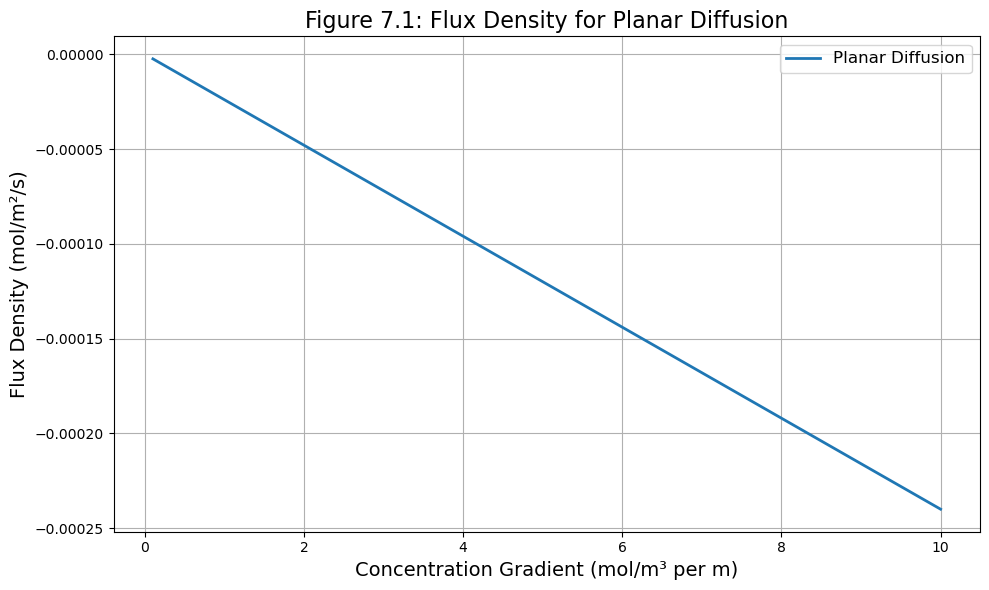

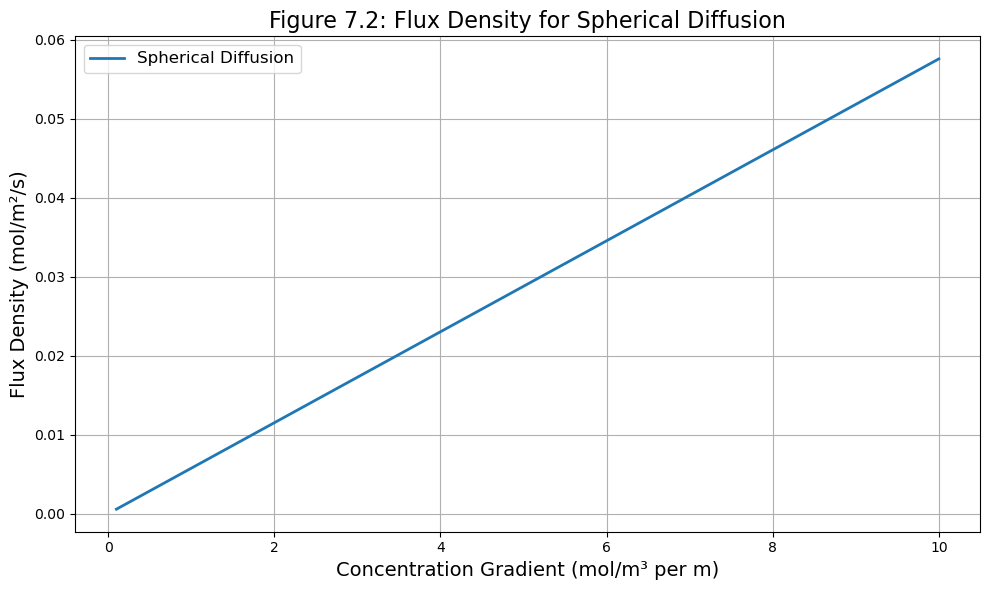

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
rho_air = 1.2  # Air density (kg/m³)
D_air = 2.4e-5  # Diffusivity of water vapor in air (m²/s)
delta_z = 0.01  # Thickness of planar layer (m)

# Planar diffusion (Figure 7.1)
def fick_law_flux(D, gradient):
    """
    Calculate flux density using Fick's Law.
    """
    return -D * gradient

gradients = np.linspace(0.1, 10, 100)  # Gradient range (mol/m³ per m)
flux_planar = fick_law_flux(D_air, gradients)  # Calculate flux for planar diffusion

# Spherical diffusion (Figure 7.2)
def conductance_spherical(rho, D, z_a, z_s):
    """
    Calculate conductance for spherical diffusion.
    """
    return (rho * D) / (z_a * (1 - z_s / z_a))

z_a = 0.015  # Outer radius (m)
z_s = 0.01  # Inner radius (m)
flux_spherical = [
    conductance_spherical(rho_air, D_air, z_a, z_s) * gradient for gradient in gradients
]

# Plot Figure 7.1
plt.figure(figsize=(10, 6))
plt.plot(gradients, flux_planar, label="Planar Diffusion", linewidth=2)
plt.xlabel("Concentration Gradient (mol/m³ per m)", fontsize=14)
plt.ylabel("Flux Density (mol/m²/s)", fontsize=14)
plt.title("Figure 7.1: Flux Density for Planar Diffusion", fontsize=16)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Figure 7.2
plt.figure(figsize=(10, 6))
plt.plot(gradients, flux_spherical, label="Spherical Diffusion", linewidth=2)
plt.xlabel("Concentration Gradient (mol/m³ per m)", fontsize=14)
plt.ylabel("Flux Density (mol/m²/s)", fontsize=14)
plt.title("Figure 7.2: Flux Density for Spherical Diffusion", fontsize=16)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


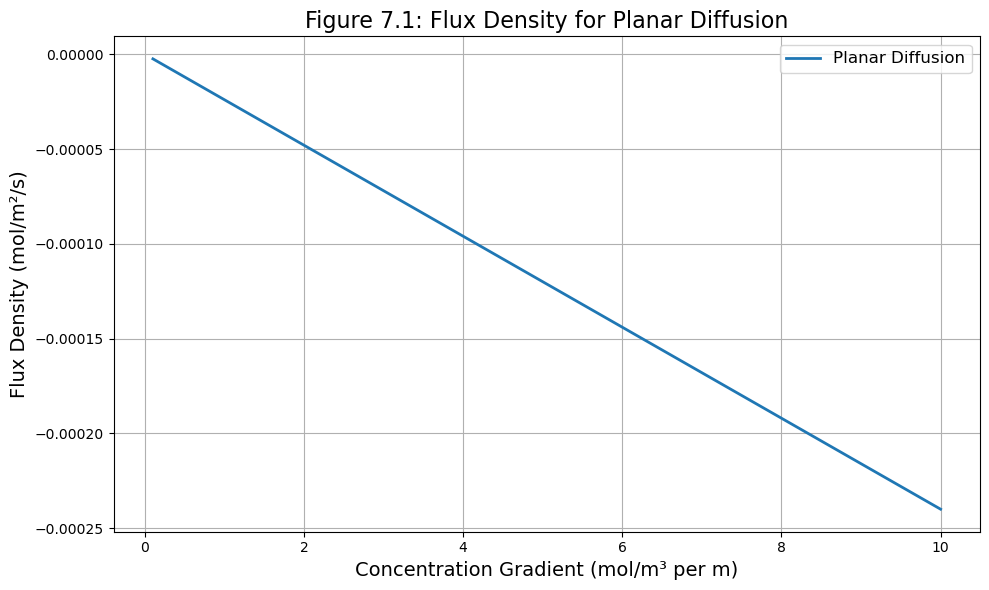

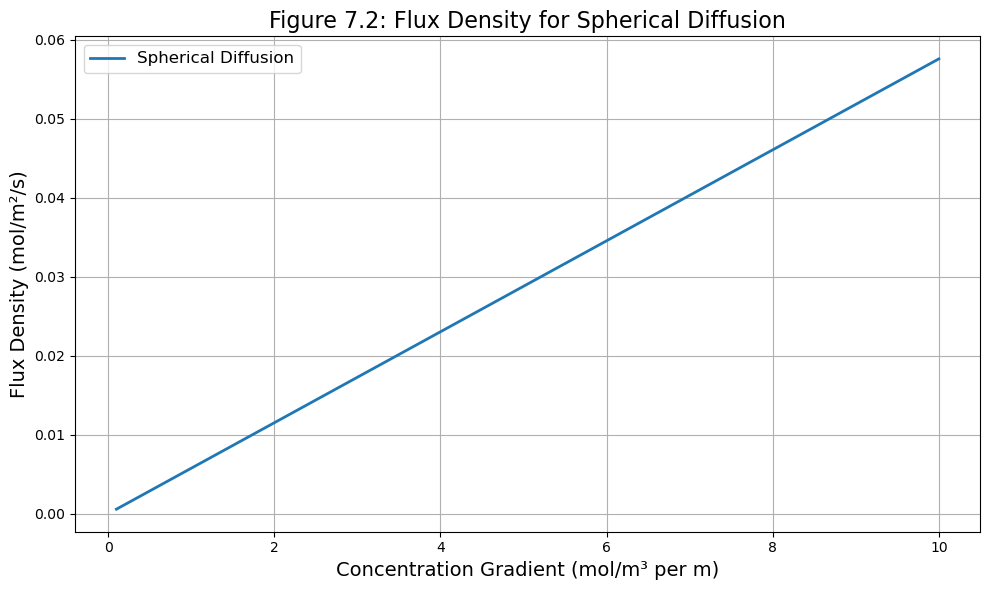

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
rho_air = 1.2  # Air density (kg/m³)
D_air = 2.4e-5  # Diffusivity of water vapor in air (m²/s)
delta_z = 0.01  # Thickness of planar layer (m)

# Planar diffusion (Figure 7.1)
gradients = np.linspace(0.1, 10, 100)  # Gradient range (mol/m³ per m)
flux_planar = fick_law_flux(D_air, gradients)  # Calculate flux for planar diffusion

# Spherical diffusion (Figure 7.2)
z_a = 0.015  # Outer radius (m)
z_s = 0.01  # Inner radius (m)
flux_spherical = [
    conductance_spherical(rho_air, D_air, z_a, z_s) * gradient for gradient in gradients
]

# Plot Figure 7.1
plt.figure(figsize=(10, 6))
plt.plot(gradients, flux_planar, label="Planar Diffusion", linewidth=2)
plt.xlabel("Concentration Gradient (mol/m³ per m)", fontsize=14)
plt.ylabel("Flux Density (mol/m²/s)", fontsize=14)
plt.title("Figure 7.1: Flux Density for Planar Diffusion", fontsize=16)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Figure 7.2
plt.figure(figsize=(10, 6))
plt.plot(gradients, flux_spherical, label="Spherical Diffusion", linewidth=2)
plt.xlabel("Concentration Gradient (mol/m³ per m)", fontsize=14)
plt.ylabel("Flux Density (mol/m²/s)", fontsize=14)
plt.title("Figure 7.2: Flux Density for Spherical Diffusion", fontsize=16)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_16284\1456202523.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(c, phi_h, label="Heat Correction Factor ($\phi_h$)", linewidth=2)
C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_16284\1456202523.py:18: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(c, phi_m, label="Momentum Correction Factor ($\phi_m$)", linestyle="--", linewidth=2)
C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_16284\1456202523.py:24: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Correction Factor ($\phi$)", fontsize=14)


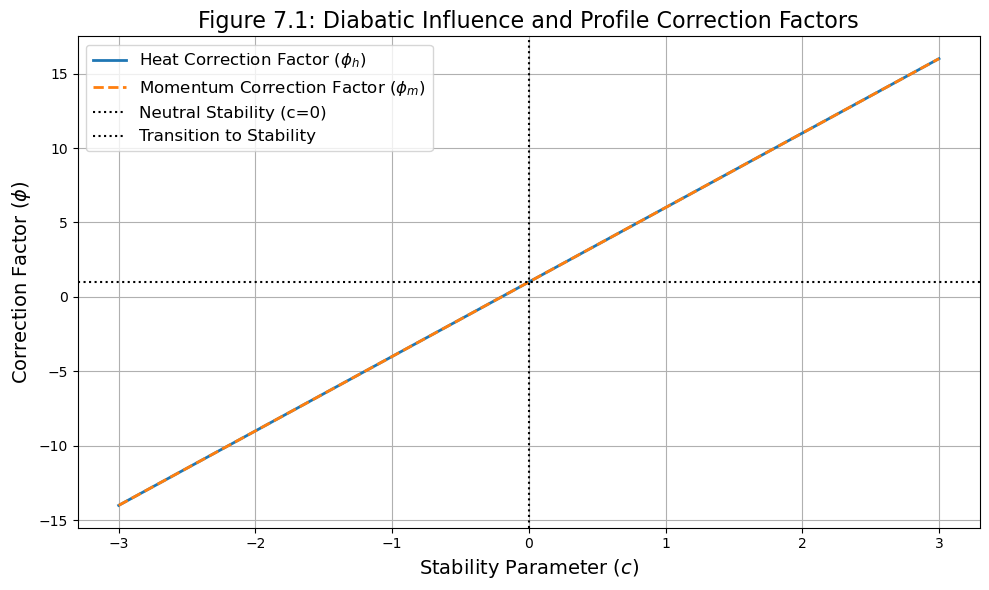

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Stability parameter (c) range
c = np.linspace(-3, 3, 100)  # Dimensionless

# Empirical constants
beta_h = 5  # For heat
beta_m = 5  # For momentum

# Profile correction factors
phi_h = 1 + beta_h * c  # For heat
phi_m = 1 + beta_m * c  # For momentum

# Plot
plt.figure(figsize=(10, 6))
plt.plot(c, phi_h, label="Heat Correction Factor ($\phi_h$)", linewidth=2)
plt.plot(c, phi_m, label="Momentum Correction Factor ($\phi_m$)", linestyle="--", linewidth=2)
plt.axhline(y=1, color="black", linestyle=":", label="Neutral Stability (c=0)")
plt.axvline(x=0, color="black", linestyle=":", label="Transition to Stability")

# Labels and legend
plt.xlabel("Stability Parameter ($c$)", fontsize=14)
plt.ylabel("Correction Factor ($\phi$)", fontsize=14)
plt.title("Figure 7.1: Diabatic Influence and Profile Correction Factors", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


In [10]:
# Given data
L = -50  # Obukhov length (m)
z = 2  # Measurement height (m)
d = 0.4  # Zero-plane displacement height (m)

# Empirical constants
beta_h = 5  # For heat
beta_m = 5  # For momentum

# Stability parameter
c = (z - d) / L

# Correction factors
phi_h = 1 + beta_h * c  # Heat correction factor
phi_m = 1 + beta_m * c  # Momentum correction factor

# Output the results
print(f"Heat Correction Factor (phi_h): {phi_h:.2f}")
print(f"Momentum Correction Factor (phi_m): {phi_m:.2f}")



Heat Correction Factor (phi_h): 0.84
Momentum Correction Factor (phi_m): 0.84
